# Laboratory Session - Exercise 04

 **Alice Pagano** - 1236916 
 
 *Padova, 3 May 2020*

In [1]:
# Import libraries
library(repr) # Library for plot size in jupyter
library(dplyr) # Library for operators
library(latex2exp) # Library for latex text
library(GoFKernel) # Library for the inverse function


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


# Index <a class="anchor" id="0"></a>

1. [Exercise 1 - Triangular distribution ](#1) <br>    
2. [Exercise 2 - Discrete probability distribution ](#2) <br> 
3. [Exercise 3 - Generate random variables ](#3) <br>
4. [Exercise 4 - Gamma distribution ](#4) <br>
5. [Exercise 5 - Middle square algorithm for random number generators ](#5) <br>

## Exercise 1 - Triangular distribution <a class="anchor" id="1"></a>
* [Index](#0)



The triangular distribution, in the interval $(a,b)$, is given by the following:

$$
f(X) =
\begin{cases}
\frac{2(x-a)}{(b-a)(c-a)} & a \le x < c \\
\frac{2(b-x)}{(b-a)(b-c)} & c \le x \le b \\
0 & \text{otherwise}
\end{cases}
$$

where $c\in[a,b]$.

### A) Plot the function, given the interval $(a,b)$

In [2]:
# Define the density function 

dfunc <- Vectorize( function(x,a=0,b=1,c=0.5){
    
        if(x >= a & x<c){
            X <- 2*(x-a)/( (b-a)*(c-a) ) 
            return(X)}
    
        else if(x >=c & x <=b){
            X <- 2*(b-x)/( (b-a)*(b-c) ) 
            return(X)}
    
        else{return(0)}
    } )


# Check if the density function is correctly normalized
cat("Area:",integrate(dfunc,0,1)$value)

Area: 1

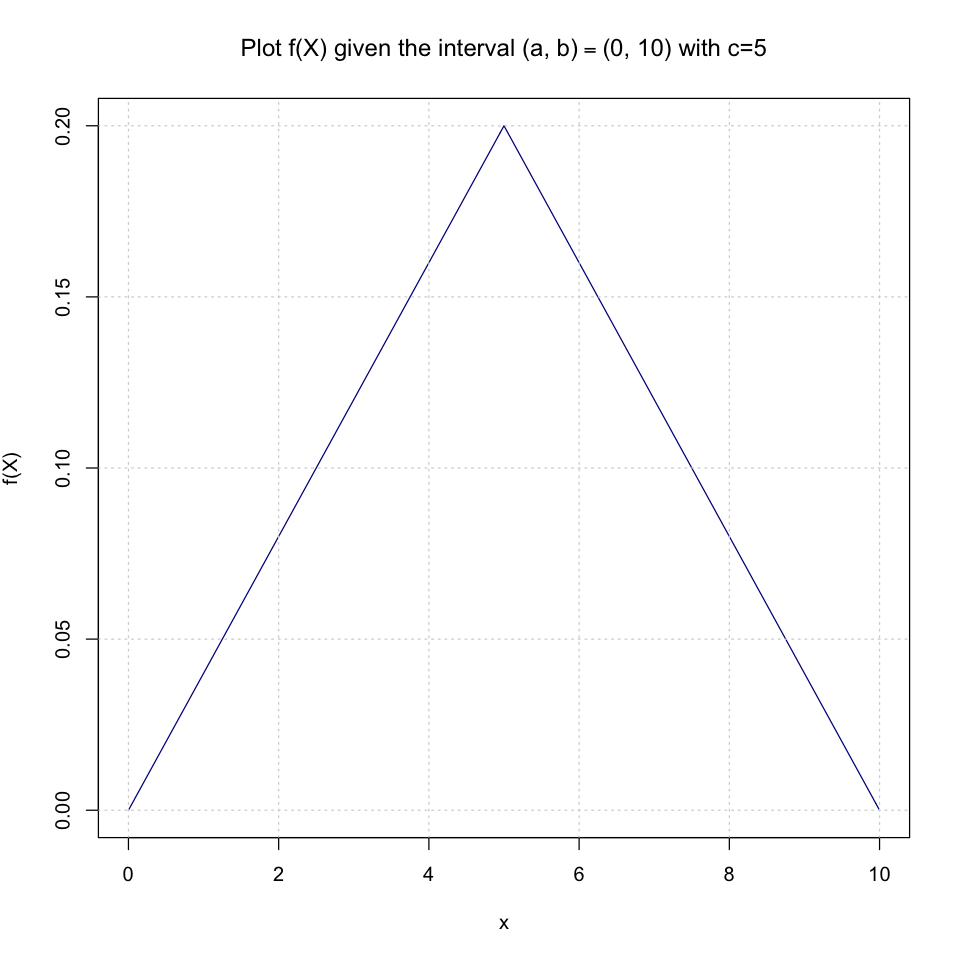

In [3]:
# Plot triangular distribution function 

# Define the interval
a <- 0
b <- 10
c <- 5

# set the size and position of the plots
options(repr.plot.width=8, repr.plot.height=8)

x <- seq(0,10,by=0.05)

plot(x,dfunc(x,a=a,b=b,c=c), type='l', col='darkblue', xlab='x', ylab=TeX("$f(X)$"),  
        main=TeX(sprintf("Plot $f(X)$ given the interval (a,b)=(%1i,%1i) with c=%1i",a,b,c)))
grid()

### B) Write an algorithm to generate random numbers from the triangular distribution

In [4]:
# Define the cumulative function

pfunc <- Vectorize( function(x,a=0,b=1,c=0.5){
         
         if(x<=a){
             X <- 0
             return(X)}
    
         else if(x >= a & x<c){
            X <- integrate(dfunc,lower=a,upper=x,a=a,b=b,c=c)$value  
            return(X)}
    
         else if(x >=c & x <=b){
            X <- (c-a)*dfunc(c,a=a,b=b,c=c)/2 +
                 integrate(dfunc,lower=c,upper=x,a=a,b=b,c=c)$value   
            return(X)}
             
         else if(x>=b){
             X <- 1
             return(X)}
             
         } )

In [5]:
# Define the quantile function as the inverse of the cumulative

qfunc <- Vectorize( function(p,a=0,b=1,c=0.5){
    
                    f <- function(x) pfunc(x,a=a,b=b,c=c)    
                    h <- pfunc(c,a=a,b=b,c=c)
    
                    if(p<=h){
                        pfunc.inv <- inverse(f,lower=a,upper=c)}
    
                    else if(p>h){
                        pfunc.inv <- inverse(f,lower=c,upper=b)}               
                        
                    return(pfunc.inv(p))
         } )

# Define the sampling function
rfunc <- function(n,a=0,b=1,c=0.5,bool=FALSE,seed=123){
        if(bool){ set.seed(seed) }       
        p <- runif(n)
        x <- qfunc(p,a=a,b=b,c=c)   
        return(x)
    }

The sampling function above is not the best one can obtain, because it uses the function "inverse" of the "GoFKernel" library which requires a large computational time with resect to other methods. However, I prefer to use that function because it gives me a more general code. 

### C) Generate $10^{4}$ random number from the triangular distribution and show them in an histogram

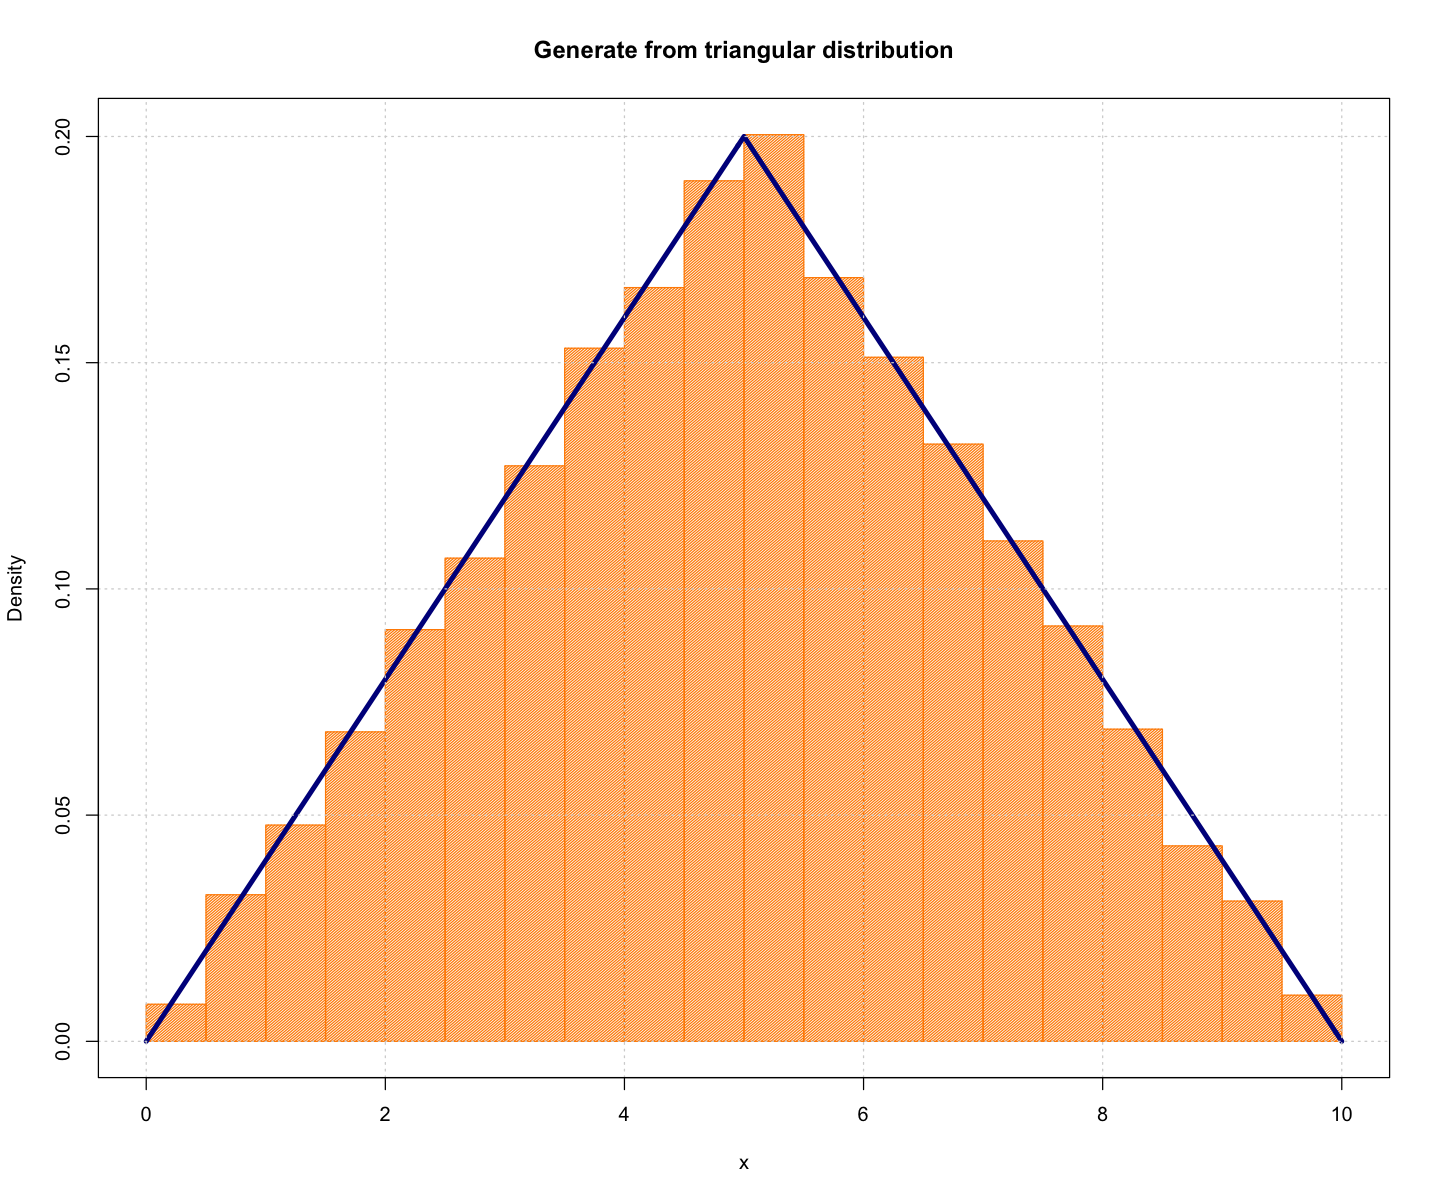

In [6]:
# Generate 10^4 random numbers from the triangular distribution
n <- 10000
a <- 0
b <- 10
c <- 5

x <- rfunc(n,a=a,b=b,c=c,bool=TRUE,seed=12345)

# Plot histogram of generated random numbers 
options(repr.plot.width=12, repr.plot.height=10)

hist(x, col='darkorange', xlab='x', ylab='Density', density=100, 
        main="Generate from triangular distribution", prob=TRUE)

lines(seq(0,10,by=0.05),dfunc(seq(0,10,by=0.05),a=a,b=b,c=c), 
      type='l', col='darkblue', lwd=4)
grid()

box()

## Exercise 2 - Discrete probability distribution<a class="anchor" id="2"></a>
* [Index](#0) 

Let us consider a discrete probability distribution defined by the following probabilities:
$
p = 0.05, 0.19, 0.14, 0.17, 0.02, 0.11, 0.06, 0.05, 0.04, 0.17
$

In [7]:
# Vector of probabilities
p <- c(0.05, 0.19, 0.14, 0.17, 0.02, 0.11, 0.06, 0.05, 0.04, 0.17)

x <- seq(1,10,length=length(p))

### A) Plot the probability density function and the cumulative density function

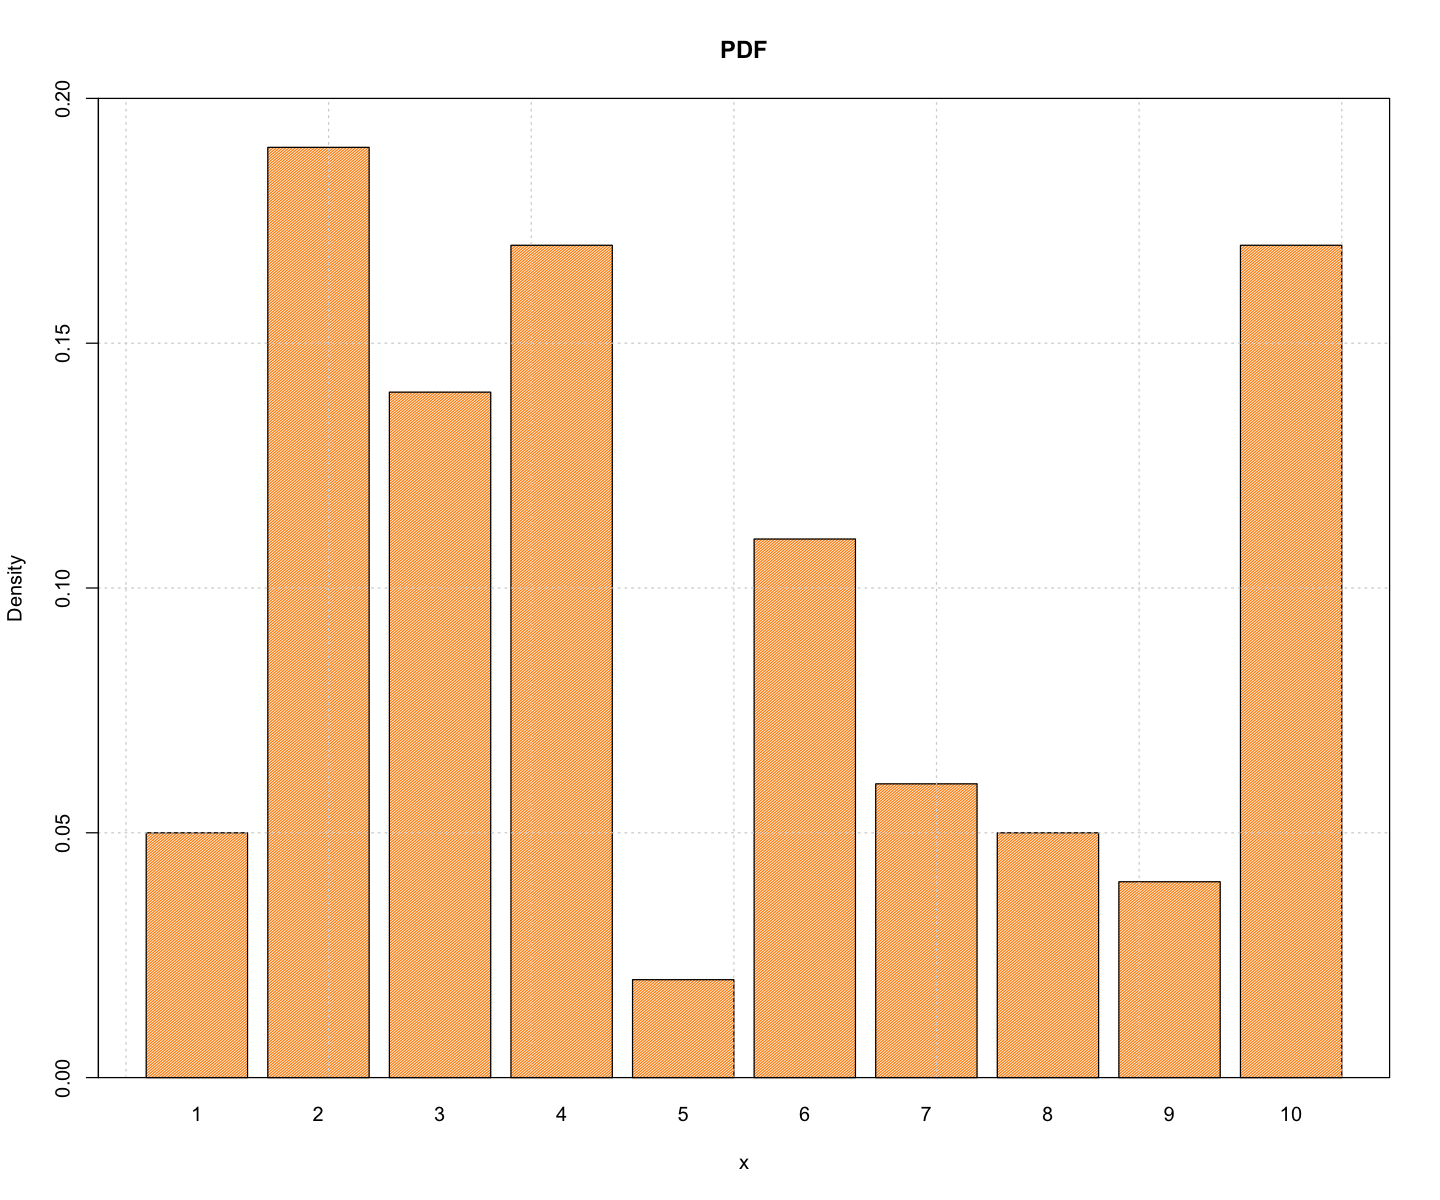

In [8]:
# Plot the probability density function

options(repr.plot.width=12, repr.plot.height=10)

barplot(p, names=x, col='darkorange', xlab='x', ylab='Density', density=100, 
        main="PDF", ylim=c(0,max(p)+0.01))
grid()
box()

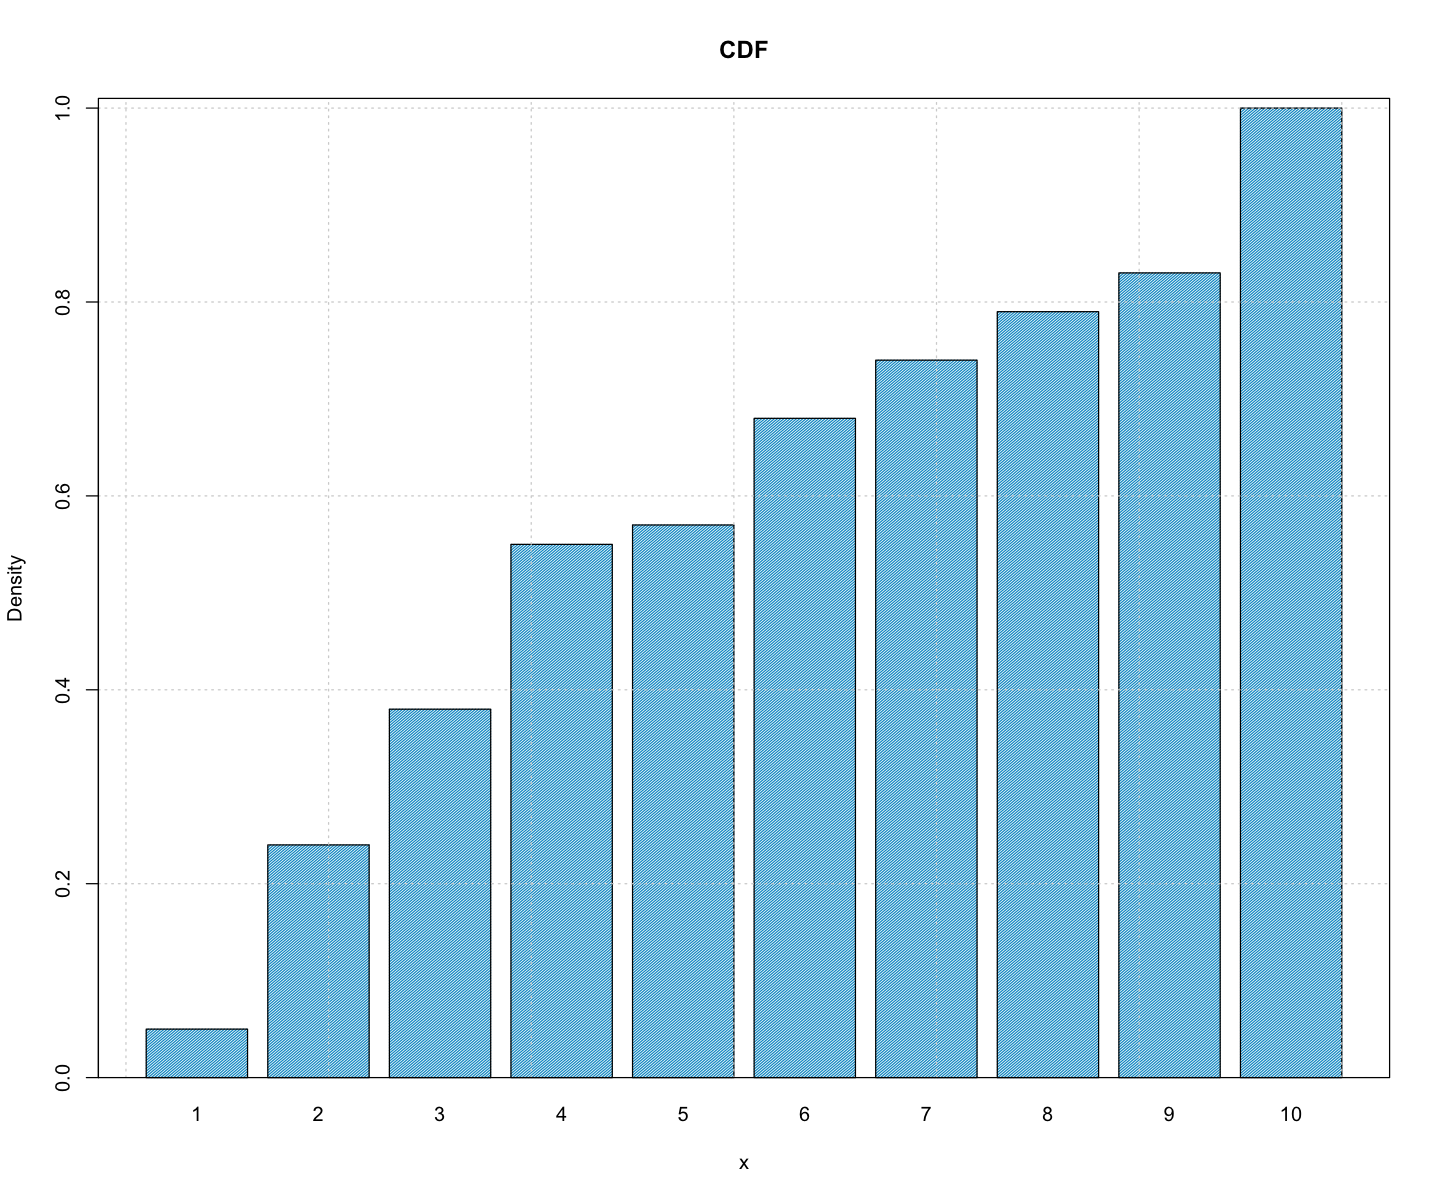

In [9]:
# Plot the cumulative density function

options(repr.plot.width=12, repr.plot.height=10)

barplot(cumsum(p), names=x, col='deepskyblue3', xlab='x', ylab='Density', density=100, 
        main="CDF", ylim=c(0,1+0.01))
grid()
box()

### B) Write an algorithm to generate random numbers from the discrete probability distribution

In [10]:
# Algorithm to generate random numbers
rdisc <-  function(n,p,bool=FALSE,seed=123){
        k <- c(0,cumsum(p))
        if(bool){ set.seed(seed) }       
        u <- runif(n)
        r <- NULL
        for(i in 1:n){
            for(j in 1:(length(k)-1)){
                if(u[i]>k[j] & u[i]<=k[j+1]){
                    x <- j
                    r <- c(r,x)
                } } } 
        return(r)} 

In [11]:
# Generate random numbers
n <- 10000
x <- rdisc(n,p,bool=TRUE,seed=12346)

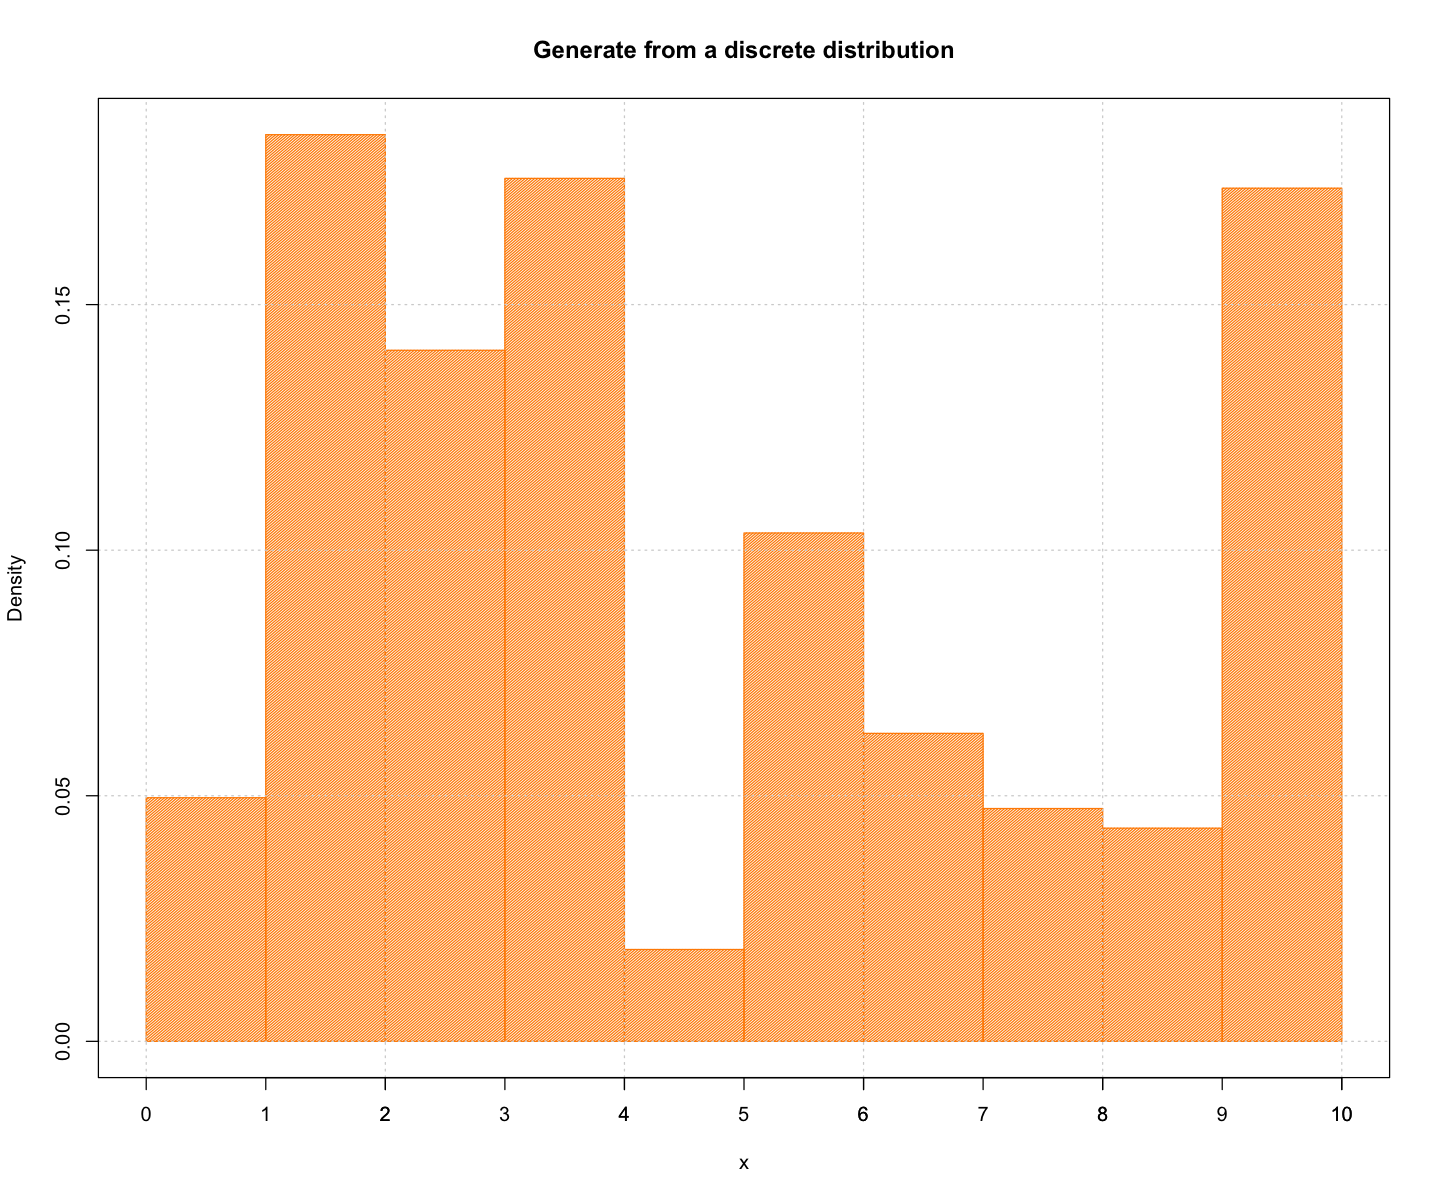

In [12]:
# Plot the histogram

options(repr.plot.width=12, repr.plot.height=10)

hist(x, col='darkorange', xlab='x', ylab='Density', density=100, 
        main="Generate from a discrete distribution", prob=TRUE, breaks = seq(0,10,1))
axis(side=1, at=seq(1,10, 1), labels=seq(1,10, 1))
grid()
box()

## Exercise 3 - Generate random variables<a class="anchor" id="3"></a>
* [Index](#0)  

Generate random variables from the following distribution:

$$
f(X) = \frac{2}{\pi R^2} \sqrt{R^2-x^2}
$$

where $-R \le x \le R$.

### A) Use acceptance-rehection method algorithm to generate random variables

Firstly, we assume $M=2/(\pi R)$ and then we generate $10^4$ random variables.

In [13]:
# Interval in which the function is defined
R <- 1

# Define the function
func <- function(x,r=1){2/(pi*r^2)*sqrt(r^2-x^2)}

# Write acceptance-rejection algorithm
ar.func <- function(n,r=1,size=100){
          a <- -r
          b <- r
          M <- 2/(pi*r)
          y <- NULL
          numbers <- NULL
          while(length(numbers)<n){            
              u1 <- runif(size,a,b)
              u2 <- runif(size,0,1)
              y <- ifelse(u2*M < func(u1,r=r), u1, NA)
              y <- y[!is.na(y)]    
              numbers <- c(numbers,y)
            }
          return(numbers[1:n])
          }

In [14]:
# Generate random variables
n <- 100000
ar <- ar.func(n,r=R)
x <- seq(-R,R,length=n)

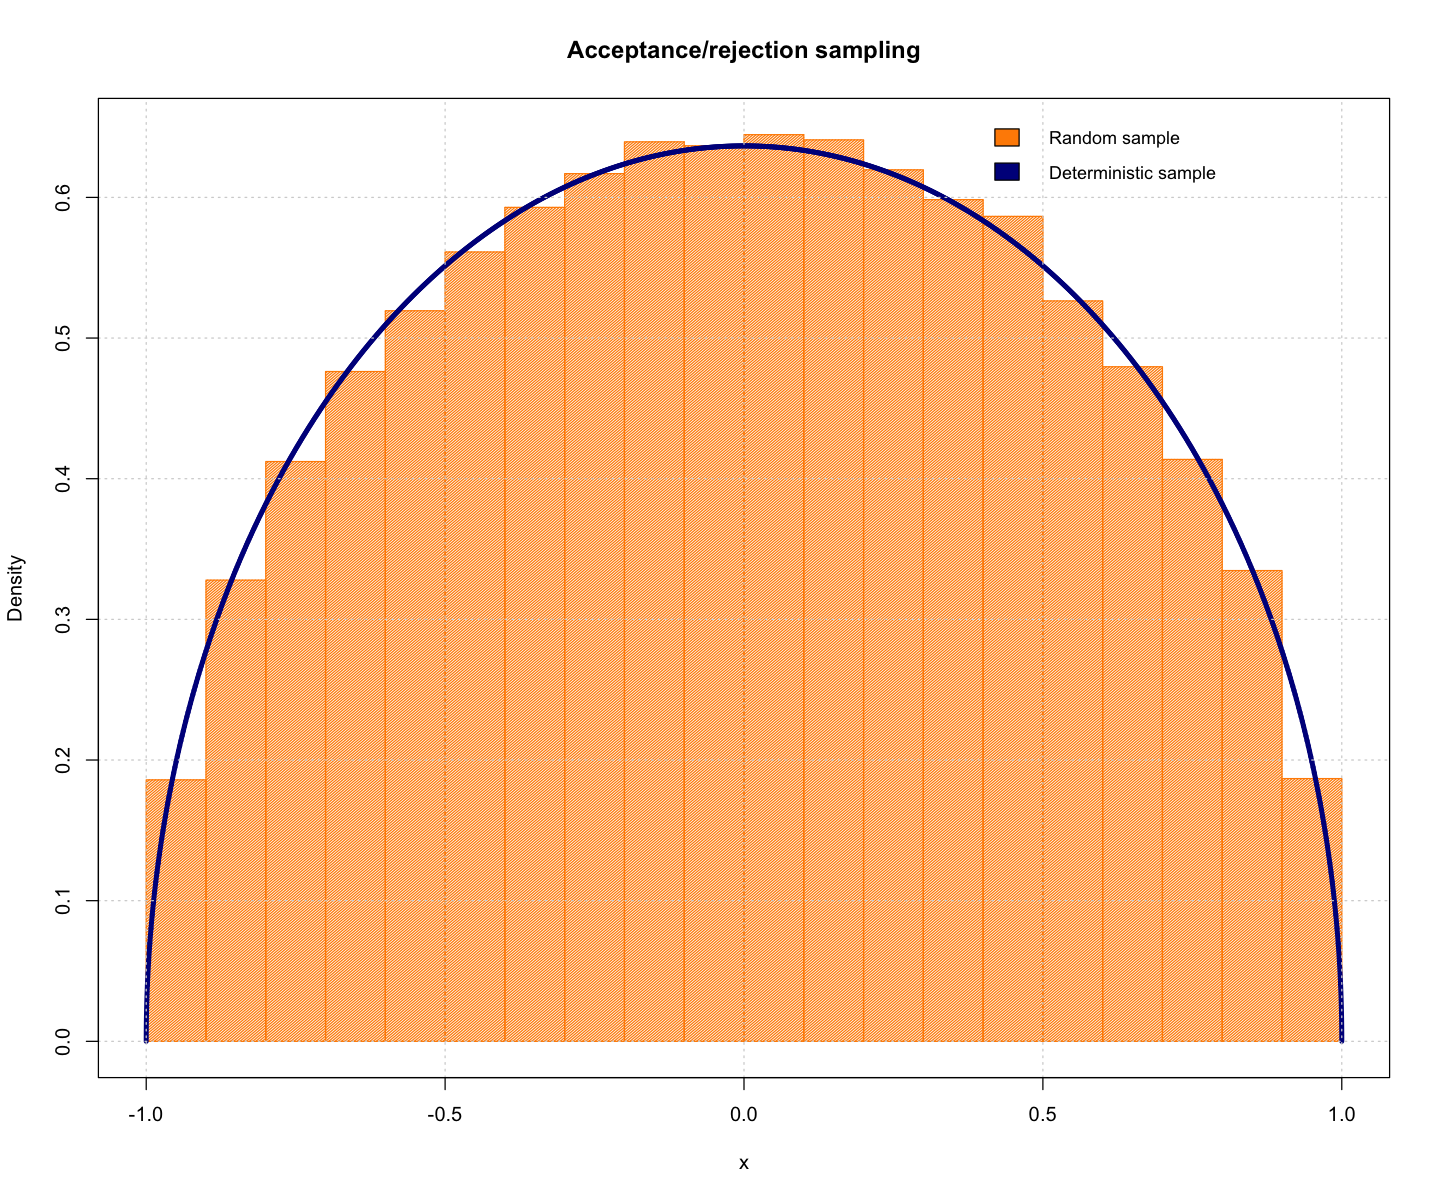

In [15]:
# Plot the histogram

options(repr.plot.width=12, repr.plot.height=10)

hist(ar, col='darkorange', xlab='x', ylab='Density', density=100, 
        main="Acceptance/rejection sampling", prob=TRUE)

lines(x,func(x,R),type='l', col='darkblue', lwd=4)

legend("topright", inset=0.005,legend=c("Random sample","Deterministic sample"),
       col=c('darkorange','darkblue'), cex=0.9,
       fill=c('darkorange','darkblue'), box.lty=0)

grid()
box()

## Exercise 4 - Gamma distribution<a class="anchor" id="4"></a>
* [Index](#0)   

Given a sequence of independent random variable $X_j \sim \Gamma(\alpha_j,\beta)$, it follows that:

$$
Y = \sum_{j=1}^{n} X_j \rightarrow Y \sim \Gamma(\alpha,\beta)
$$
where
$$
\alpha = \sum_{j=1}^{n} \alpha_j
$$

Moreover, if $\alpha=m$ is an integer, a random variable from gamma distribution $\Gamma(m,\beta)$ (Erlang distribution) can be obtained by summing $m$ independent exponential random variables $X_j \sim e^{\beta}$:

$$
Y = \beta \sum_{j=1}^{m} (-\ln U_j) = - \beta \ln \prod_{j=1}^{m} U_j
$$

where $U_j$ is a random variable generated by a uniform distribution.

### A) Write an algorithm to sample variables from an Erlang distribution $\Gamma(m,\beta)$

In [16]:
erlang.func <- function(n,m=10,beta=1,bool=FALSE,seed=123){
               if(bool){ set.seed(seed) }
               Y <- NULL
               for(i in 1:n){
                   x <- runif(m)
                   x.log <- -log(x)
                   Y.val <- beta*sum(x.log)
                   Y <- c(Y,Y.val) }
               return(Y)
               }

In [17]:
n <- 10000 # Number of random variables
m <- 10 
beta <- 1

x1 <- erlang.func(n,m=m,beta=beta)

# Check if the algorithm obtained is correct 
# by comparing it with the yet defined function in R
x2 <- rgamma(n,shape=m,rate=beta)

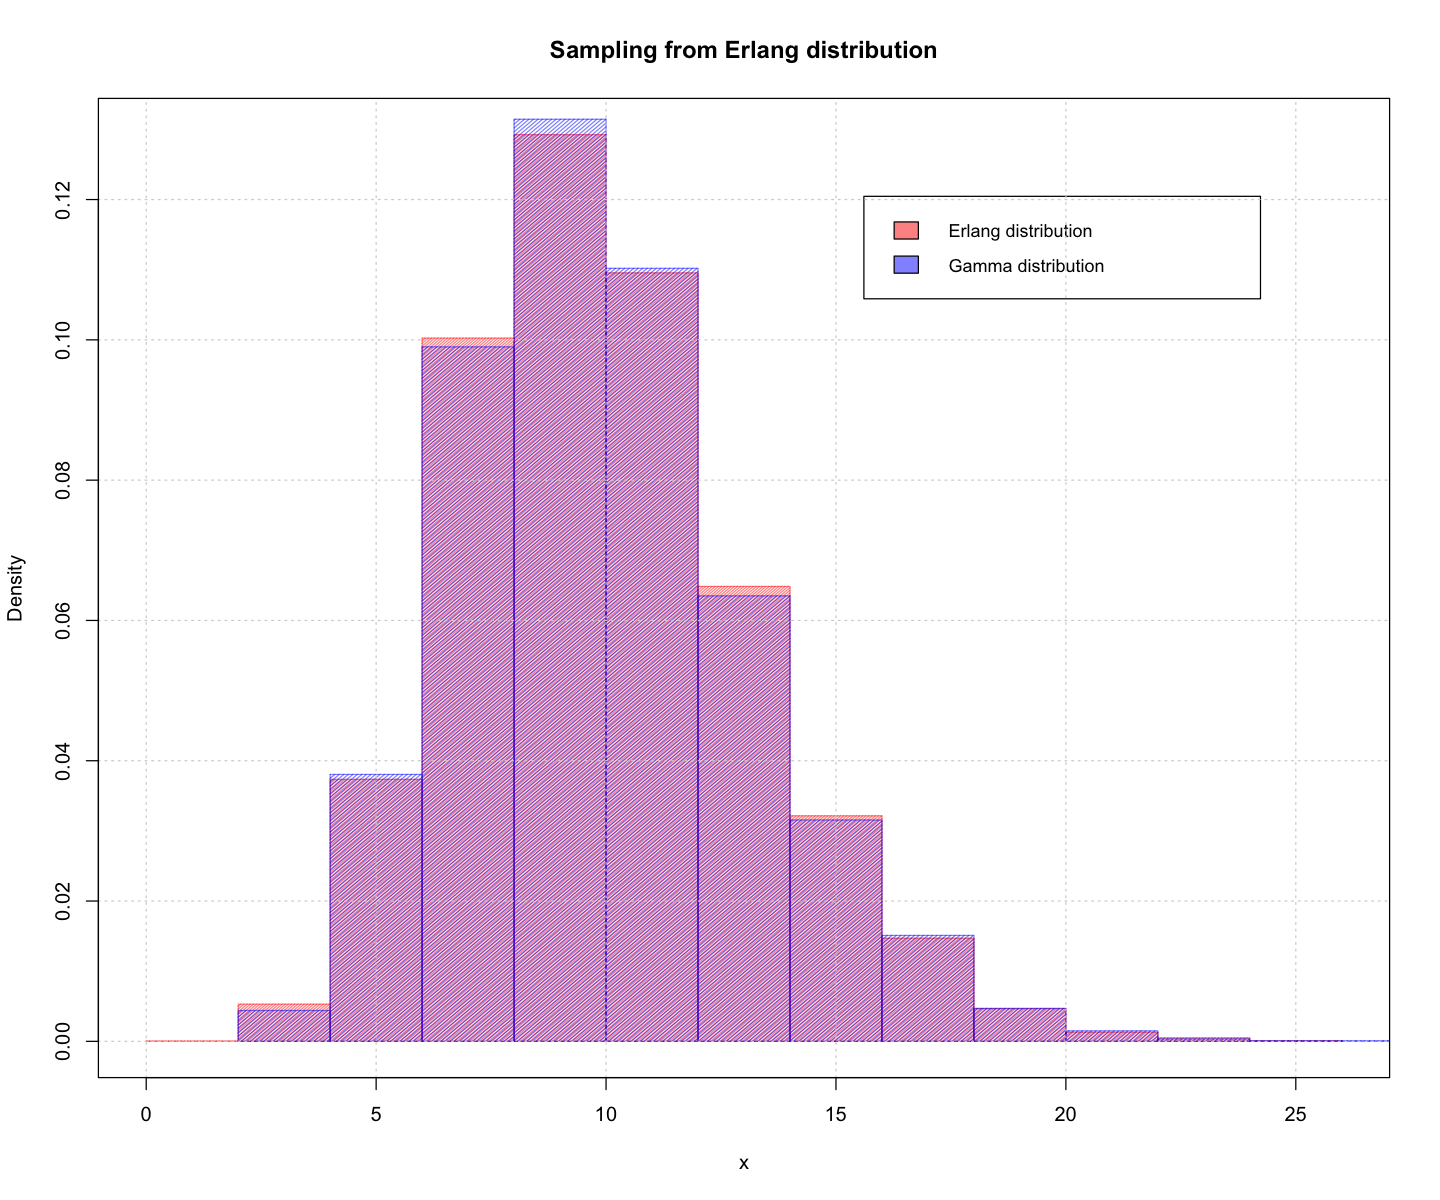

In [18]:
# Plot the histograms

options(repr.plot.width=12, repr.plot.height=10)

hist(x1, col=rgb(1,0,0,0.5), xlab='x', ylab='Density', density=100, 
        main="Sampling from Erlang distribution", prob=TRUE)

hist(x2, col=rgb(0,0,1,0.5), xlab='x', ylab='Density', density=70,
        main="Sampling from Erlang distribution", prob=TRUE, add=TRUE)

legend("topright", inset=0.1,legend=c("Erlang distribution","Gamma distribution"),
       col=c(rgb(1,0,0,0.5),rgb(0,0,1,0.5)), cex=0.9,
       fill=c(rgb(1,0,0,0.5),rgb(0,0,1,0.5)), box.lty=1)

grid()
box()

## Exercise 5 - Middle square algorithm for random number generators<a class="anchor" id="5"></a>
* [Index](#0)    

### Write R code to implenent middle square algorithm for random number generator

In [19]:
# Implement middle square algorithm
msa.alg <- function(seed=10,len=1,debug=FALSE){
    
           seq <- NULL
           x <- seed
    
           for(i in 1:len){
           if(debug){cat('x:',x,'\n')}             
           # Seed length
           n <- length(unlist(strsplit(as.character(x),"")))
           if(debug){cat('Length x:',n,'\n')}
           x.sq <- x*x
           # Convert x.sq into a list of characters
           number <- unlist(strsplit(as.character(x.sq),""))       
    
           # Define head and tail
           if(n%%2==0){
               head.length <- n/2
               tail.length <- n/2
           }
           else{
               head.length <- floor(n/2)
               tail.length <- floor(n/2)+1
           }
           
           # Resize vector number adding 0 
           number <- c(rep(0, 2*n-length(number)), number) 
           if(debug){cat('number:',number,'\n')} 
           if(debug){cat('Length number:',length(number),'\n')} 
               
           # Take the middle part of the vector and reconvert
           x <- number[(head.length+1):(2*n-tail.length)]
           x <- as.numeric(paste(x, collapse=""))
           if(debug){cat('x:',x,'\n\n')}
           
           if(x %in% seq){
               cat("Warning: only",i,"numbers of",len,"required are generated.")
               break}
           # Add x in the sequence of numbers
           seq <- c(seq,x)             
           }      
           return(seq)
        }

In [20]:
# Generate random numbers of len=len with a seed=seed
msa.alg(seed=380,len=60)

[1] 444 971 428 831 905 190 361 303 918 427 823 773 975 506 560 136 184 338 142
[20] 201 404 632 994 880 744 535 862 430 849 208 432 866 499 490 401 608 696 844
[39] 123 151 228 519 693 802